In [1]:
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scripts.data_generator as data_generator
import scripts.feature_ranking as feature_ranking
import scripts.features_2d as features_2d
import scripts.ga as ga
import scripts.main as main
import scripts.cnn_models as cnn_models
import scripts.ga_evaluation as ga_evaluation
import tensorflow as tf
from IPython import get_ipython
from keras.backend.tensorflow_backend import set_session
from tqdm import tqdm

config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.Session(config=config)
set_session(sess)  # set this TensorFlow session as the default

plt.ion()
plt.show()
sys.path.append("..")

random_state=4
random.seed( random_state )
np.random.seed(random_state)


%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5



# Generate dataset

The cell below creates 3 gaussian clusters having 0.05 cluster standard deviation, accompanied by 300 unrelated samples from each of the following distributions: uniform, normal, negative binomial.

COV 0.5 
ARI  0.53, std 4


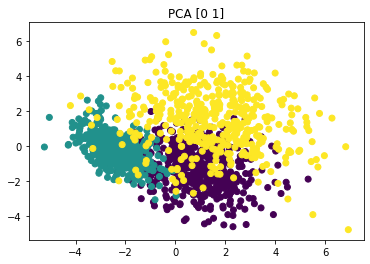

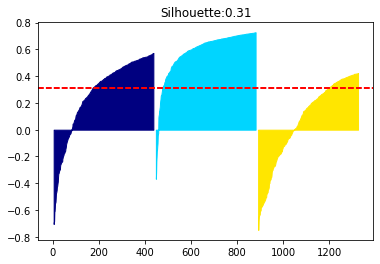

COV 0.5 
ARI  0.77, std 4


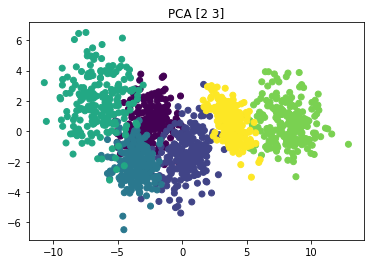

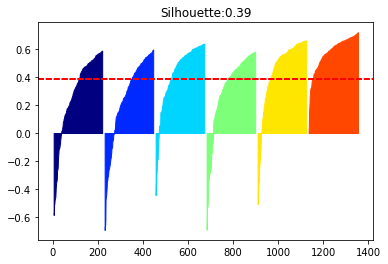

COV 0.5 
ARI  0.65, std 4


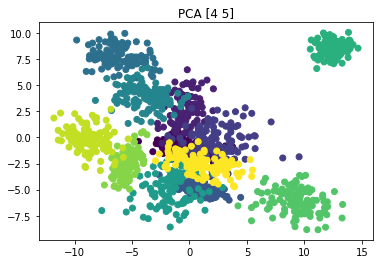

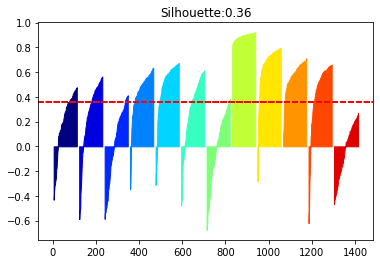

Total: (1300, 411), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 


In [35]:
std =4
n_clusters_per_subpace = [3,6,12]
cluster_std = None
n_uniform_features=700
n_normal_features=700
n_neg_binomial = 700
n_gamma = 500
n_redundant_clusters = 0
n_redundant_cluster_size = 0
data, best_subspaces, truths = data_generator.make_data_for_ga(
                 n_clusters_per_subpace,
                 cluster_std=[std, std,std],
                 n_uniform_features=200,
                 n_normal_features=200,
                 n_neg_binomial=0,
                 n_gamma=0,
                 n_beta=0,
                 random_redundant=True,
                 n_redundant=5,
                 n_outlier_features=0,
                 n_cutoff=0,
                 n_bimodal_features=0,
                 min_subspace_features=2,
                 max_subspace_features=3,
                 max_neg_bin_p = 0.3,
                 n_samples=1300,
                 plot=True,
                 isotropic = False)


In [ ]:
n_clusters_per_subpace = [5,5,5]
cluster_std=[0.05, 0.05, 0.05]
n_uniform_features=300
n_normal_features=300
n_neg_binomial = 300
n_clusters = int(np.mean(n_clusters_per_subpace))

n_redundant_clusters = 0
n_redundant_cluster_size = 0
data, best_subspaces, truths = data_generator.make_data_for_ga(
                     n_clusters_per_subpace,
                     cluster_std=cluster_std,
                     n_uniform_features=n_uniform_features,
                     n_normal_features=n_normal_features,
                     n_neg_binomial=n_neg_binomial,
                     random_redundant=True,
                     n_cutoff=0,
                     min_subspace_features=4,
                     max_subspace_features=10,
                     max_neg_bin_p = 0.3,
                     n_samples=None,
                     plot=True)
truth = None
imp_f = np.concatenate(best_subspaces)
nb_top_subspaces = len(n_clusters_per_subpace) + 1 # number of subspaces to return
data.shape, imp_f, best_subspaces

# Analyze dataset with 1 method call

We start with the unsupervised analysis which is performed with both HDBSCAN and GMM. We analyze and compare the obtained results.

In [10]:
all_results = {}

In [11]:
method = "adapted_silhouette"
clustering = "hdbscan"
all_results[f"{clustering}_{method}"] = main.discovery_analysis(
    data,
    truth,
    n_clusters,
    nb_top_subspaces=nb_top_subspaces,
    sampling=None,
    allow_subspace_overlap=True,
    redundant_threshold=0.5,
    round_size=3,
    metric='euclidean',
    method=method,
    clustering=clustering,
    max_ranking_2d=None)

*** Unsupervised Analysis
*** Computing 1D feature ranking ...
Dispersion tests took 0.14 sec
Entropy computation 0.76 sec
KNN computation 0.03 sec
Sorting and thresholds 0.06 sec
Performing hierarchical clustering...
Hierarchical clustering 0.2 sec
Handle redundant features 0.01 sec
Returning 0 redundant features and  31 important features
*** Exploring 2D feature space with NN ...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


handle_close_important (31, 3), total 1722, 0.12626612186431885
relevant_features 585 => computing 3467 
trimming 981 to 0
handle_important_features (31, 3),  total 3467, 0.12626612186431885
irrelevant_features 336 => computing 998
handle_not_important_features (31, 3), total 998, 0.12626612186431885
handle_all_features 921 => computing 2754


  0%|          | 0/13 [00:00<?, ?it/s]

handle_all_features (344, 3),  total 2754, 0.12626612186431885
Returning (344, 3), explored a total of 8941 feature pairs
*** Optimization algorithm 
Non redundant features 921, orig size 921, nb imp : 31
Selecting (50, 4) from archive


 23%|██▎       | 3/13 [00:30<01:48, 10.81s/it]

,adapted_silhouette,features,partition,size,structure
0,0.534455,"[2, 3, 7, 9, 14]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5.0,"Counter({1: 480, 0: 120})"


Selecting (28, 4) from archive


 46%|████▌     | 6/13 [01:13<01:24, 12.04s/it]

,adapted_silhouette,features,partition,size,structure
0,0.534455,"[2, 3, 7, 9, 14]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5.0,"Counter({1: 480, 0: 120})"
1,0.487831,"[1, 4, 6, 8, 19]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5.0,"Counter({1: 480, 0: 120})"


Selecting (35, 4) from archive


 69%|██████▉   | 9/13 [01:54<00:47, 11.95s/it]

,adapted_silhouette,features,partition,size,structure
0,0.534455,"[2, 3, 7, 9, 14]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5.0,"Counter({1: 480, 0: 120})"
1,0.487831,"[1, 4, 6, 8, 19]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5.0,"Counter({1: 480, 0: 120})"
2,0.619577,"[0, 3, 4, 5, 6, 7, 8, 9, 10, 18]","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",10.0,"Counter({4: 120, 3: 120, 0: 120, 1: 120, 2: 120})"


Selecting (35, 4) from archive


 92%|█████████▏| 12/13 [02:41<00:12, 12.87s/it]

,adapted_silhouette,features,partition,size,structure
0,0.534455,"[2, 3, 7, 9, 14]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5.0,"Counter({1: 480, 0: 120})"
1,0.487831,"[1, 4, 6, 8, 19]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5.0,"Counter({1: 480, 0: 120})"
2,0.619577,"[0, 3, 4, 5, 6, 7, 8, 9, 10, 18]","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",10.0,"Counter({4: 120, 3: 120, 0: 120, 1: 120, 2: 120})"
3,0.105421,"[126, 286]","[-1, 2, -1, 1, 1, 1, 2, -1, -1, -1, -1, 2, -1,...",2.0,"Counter({-1: 184, 1: 163, 0: 128, 2: 125})"


Selecting (2, 4) from archive


100%|██████████| 13/13 [03:02<00:00, 14.02s/it]


In [12]:
method = "adapted_ratkowsky_lance"
clustering = "gmm"
all_results[f"{clustering}_{method}"] = main.discovery_analysis(
    data,
    truth,
    n_clusters,
    nb_top_subspaces=nb_top_subspaces,
    sampling=None,
    allow_subspace_overlap=True,
    redundant_threshold=0.5,
    round_size=3,
    metric='euclidean',
    method=method,
    clustering=clustering,
    max_ranking_2d=None)

*** Unsupervised Analysis
*** Computing 1D feature ranking ...
Dispersion tests took 0.15 sec
Entropy computation 0.83 sec
KNN computation 0.03 sec
Sorting and thresholds 0.05 sec
Performing hierarchical clustering...
Hierarchical clustering 0.21 sec
Handle redundant features 0.01 sec
Returning 0 redundant features and  31 important features
*** Exploring 2D feature space with NN ...
handle_close_important (31, 3), total 1722, 0.12626612186431885
relevant_features 585 => computing 3467 
trimming 981 to 0
handle_important_features (31, 3),  total 3467, 0.12626612186431885
irrelevant_features 336 => computing 998
handle_not_important_features (31, 3), total 998, 0.12626612186431885
handle_all_features 921 => computing 2754


  0%|          | 0/13 [00:00<?, ?it/s]

handle_all_features (344, 3),  total 2754, 0.12626612186431885
Returning (344, 3), explored a total of 8941 feature pairs
*** Optimization algorithm 
Non redundant features 921, orig size 921, nb imp : 31
Selecting (50, 4) from archive


 23%|██▎       | 3/13 [00:23<01:19,  7.93s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.155507,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",16.0,"Counter({0: 120, 3: 120, 1: 120, 4: 120, 2: 120})"


Selecting (27, 4) from archive


 46%|████▌     | 6/13 [01:01<01:08,  9.84s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.155507,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",16.0,"Counter({0: 120, 3: 120, 1: 120, 4: 120, 2: 120})"
1,0.107788,"[38, 174]","[3, 1, 1, 1, 2, 1, 3, 4, 2, 3, 2, 4, 4, 1, 3, ...",2.0,"Counter({3: 138, 2: 134, 1: 120, 4: 114, 0: 94})"


Selecting (4, 4) from archive


 69%|██████▉   | 9/13 [01:29<00:35,  8.85s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.155507,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",16.0,"Counter({0: 120, 3: 120, 1: 120, 4: 120, 2: 120})"
1,0.107788,"[38, 174]","[3, 1, 1, 1, 2, 1, 3, 4, 2, 3, 2, 4, 4, 1, 3, ...",2.0,"Counter({3: 138, 2: 134, 1: 120, 4: 114, 0: 94})"
2,0.104643,"[7, 9, 14, 128, 291]","[0, 4, 1, 1, 1, 3, 4, 0, 3, 4, 1, 0, 3, 4, 0, ...",5.0,"Counter({4: 148, 1: 123, 2: 120, 0: 108, 3: 101})"


Selecting (2, 4) from archive


 92%|█████████▏| 12/13 [02:03<00:09,  9.47s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.155507,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",16.0,"Counter({0: 120, 3: 120, 1: 120, 4: 120, 2: 120})"
1,0.107788,"[38, 174]","[3, 1, 1, 1, 2, 1, 3, 4, 2, 3, 2, 4, 4, 1, 3, ...",2.0,"Counter({3: 138, 2: 134, 1: 120, 4: 114, 0: 94})"
2,0.104643,"[7, 9, 14, 128, 291]","[0, 4, 1, 1, 1, 3, 4, 0, 3, 4, 1, 0, 3, 4, 0, ...",5.0,"Counter({4: 148, 1: 123, 2: 120, 0: 108, 3: 101})"
3,0.105097,"[7, 9, 14, 103, 139]","[0, 1, 0, 1, 4, 1, 0, 0, 4, 1, 3, 1, 1, 4, 1, ...",5.0,"Counter({1: 155, 2: 120, 4: 116, 3: 108, 0: 101})"


Selecting (5, 4) from archive


100%|██████████| 13/13 [02:23<00:00, 11.01s/it]


In [13]:
eval_df = ga_evaluation.evaluate_ga_result(all_results, best_subspaces, truths)
eval_df.groupby("experiment").agg({"identified_features": "mean", "ari": "mean"})

,identified_features,ari
experiment,,
gmm_adapted_ratkowsky_lance,0.851852,1.000000
hdbscan_adapted_silhouette,0.388889,0.604707


# Semi-supervised approach
Select a pair of features from one target subspace and perform the maximization analysis

In [ ]:
seed =  np.random.choice(best_subspaces[0], 2, replace = False)
seed

In [ ]:
result = main.semi_supervised_analysis([seed],
                                       data,
                                       truth,
                                       n_clusters,
                                       sampling=None,
                                       debug=False,
                                       allow_subspace_overlap=True,
                                       redundant_threshold=0.5,
                                       metric='euclidean',
                                       method="adapted_ratkowsky_lance",
                                       model_file=f'models/gmm_arl.h5',
                                       clustering="gmm")
subspace = result["features"].values[0]

In [ ]:
clustering = "gmm"
main.evaluate_subspace(subspace,
                       data,
                       clustering,
                       n_clusters,
                       truths[0],
                       methods=["adapted_ratkowsky_lance", "silhouette"])

# Step by step approach

In [ ]:
meta_features = feature_ranking.rank_features(data,
                                              nb_bins=20,
                                              rank_threshold=90,
                                              z_file=None,
                                              metric='euclidean',
                                              redundant_threshold=0.4)

In [ ]:
model_file = "models/gmm_arl.h5"
n_clusters = 5
population, n = features_2d.run(data, n_clusters,
                       meta_features,
                       model_file=model_file,
                       add_close_population=False)
population.shape

In [ ]:
round_size = 4
debug = False
ignore_redundant= True
epochs = 5*round_size
globalResults = {}

In [ ]:
clustering = "hdbscan"
method = "adapted_silhouette"
threshold=0.1
score_tolerance=0.01

truth = None

sampling = {
    "ARCHIVE2D": { 
        "ga": 0.5,
        "max": 0.5 },
    "CLOSE": { 
        "ga": 0.25,
        "max": 0.25 },
    "IMP1D": { 
        "ga": 0.15,
        "max": 0.15 },
    "RANDOM": { 
        "ga": 0.1,
        "max": 0.1},
}
params = ga.ga_parameters(
    n_clusters,
    data.shape[1],
    truth,
    meta_features,
    method=method,
    truth_methods=['ari'],
    archive_2d=population[population["pred"] > threshold],
    debug=debug,
    epochs=epochs,
    round_size=round_size,
    sampling = sampling,
    ignore_redundant = ignore_redundant,
    allow_subspace_overlap = False,
    improvement_per_mutation_report = True,
    score_tolerance=score_tolerance,
    clustering = clustering,
    total_maximisation_exploration = 150

)
print(params["sampling_actions"], params["maximisation_sizes"] , params["sampling_prob"])
params

solutions, archive= ga.run(data, params)
display(solutions)
globalResults[f"{clustering}_{method}"] = solutions

In [ ]:
clustering = "gmm"
method = "adapted_ratkowsky_lance"
threshold=0.09
score_tolerance=0.009

truth = None

sampling = {
    "ARCHIVE2D": { 
        "ga": 0.5,
        "max": 0.5 },
    "CLOSE": { 
        "ga": 0.25,
        "max": 0.25 },
    "IMP1D": { 
        "ga": 0.15,
        "max": 0.15 },
    "RANDOM": { 
        "ga": 0.1,
        "max": 0.1},
}
params = ga.ga_parameters(
    n_clusters,
    data.shape[1],
    truth,
    meta_features,
    method=method,
    truth_methods=['ari'],
    archive_2d=population[population["pred"] > threshold],
    debug=debug,
    epochs=epochs,
    round_size=round_size,
    sampling = sampling,
    ignore_redundant = ignore_redundant,
    allow_subspace_overlap = False,
    improvement_per_mutation_report = True,
    score_tolerance=score_tolerance,
    clustering = clustering,
    total_maximisation_exploration = 150

)
print(params["sampling_actions"], params["maximisation_sizes"] , params["sampling_prob"])
params

solutions, archive= ga.run(data, params)
display(solutions)
globalResults[f"{clustering}_{method}"] = solutions

In [ ]:
eval_df = ga_evaluation.evaluate_ga_result(globalResults, best_subspaces, truths)
eval_df.groupby("experiment").agg({"identified_features": "mean", "ari": "mean"})